# 1. Setup

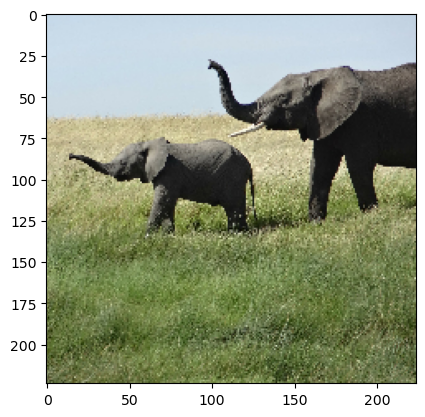

In [1]:
# load libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt


# load model
from keras.applications.vgg16 import VGG16
model = VGG16()

# load data
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

url='https://img-datasets.s3.amazonaws.com/elephant.jpg'
fn=tf.keras.utils.get_file(origin=url)

input_size=(224,224) # make sure input_size was properly defined above ....
img = image.load_img(fn, target_size=input_size)
plt.imshow(img)
plt.show()

# preprocess data
x = image.img_to_array(img)  # PIL -> numpy
x = x[np.newaxis, ...]       # expand to sample dimension, np.expand_dims(x, axis=0)
x = preprocess_input(x)      # preprocess as was done for Vgg16, c.f --> handwritten digits

In [7]:
ds,info = tfds.load('mnist', split='train', shuffle_files=True, with_info=True)
assert isinstance(ds, tf.data.Dataset)
print(ds)
tfds.as_dataframe(ds.take(4), info)

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


2024-02-15 18:18:49.459566: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


,image,label
0,,4
1,,1
2,,0
3,,7
4,,8
5,,1
6,,2
7,,7
8,,1
9,,6


In [3]:
nr = 400
samples = list(ds.take(nr).as_numpy_iterator())
X = np.stack([s['image'] for s in samples], axis=0)
y = np.array([s['label'] for s in samples]) 
print(X.shape, y.shape)

(400, 28, 28, 1) (400,)


2024-02-15 18:16:07.094268: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


X shapes:  (400, 28, 28, 1)
layer original: X.shape: (400, 784) y.shape: (400,)
PCA Shapes:  (400, 2)


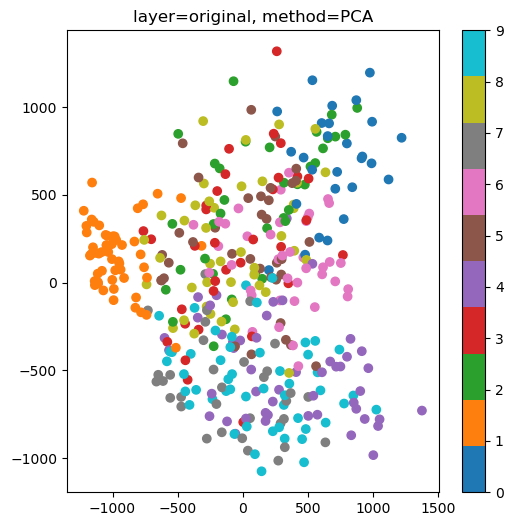

In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def plot_red(X, y, layer='original', method='PCA'):

    print(f'layer {layer}: X.shape: {X.shape} y.shape: {y.shape}')    

    if (method=='PCA'):
        X_2D = PCA(n_components = 2).fit_transform(X)
        print('PCA Shapes: ',X_2D.shape)
    if (method=='tSNE'):
        X_2D = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)

    plt.figure(figsize=(6, 6))
    cm = plt.get_cmap('tab10')
    plt.scatter( X_2D[:,0], X_2D[:,1] , c=y, cmap=cm)
    plt.title(f'layer={layer}, method={method}')
    plt.colorbar()
    plt.show()


print('X shapes: ',X.shape)
plot_red(X.reshape(nr,-1), y, 'original', 'PCA')

# define new model: X -> last layer
#layer_name = 'last'
#layer_model = tf.keras.Model(inputs=model.input,
#                             outputs=model.get_layer(layer_name).output)

#X_lay = layer_model(X).numpy()      # last layer representation of X
#plot_red(X_lay.reshape(nr,-1), layer_name)


,image,label
0,,9 (n03888257)
1,,3 (n03000684)
2,,2 (n02979186)
3,,1 (n02102040)
4,,9 (n03888257)
5,,3 (n03000684)

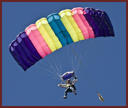
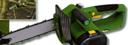
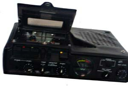
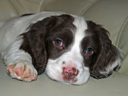
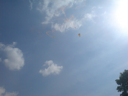
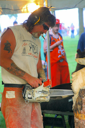

In [59]:
perc=1
set='imagenette'
sp = ['validation[:6]', 'train[:6]']
ds, info = tfds.load(set, split=sp, with_info=True)
tfds.as_dataframe(ds[0].take(10), info)

In [12]:
#ds, info = tfds.load('imagenet_', split='train', with_info=True)
ds, info = tfds.load('mnist', split='train', with_info=True)


tfds.as_dataframe(ds.take(4), info)
#fig = tfds.show_examples(ds, info)



2024-02-14 23:42:21.865199: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


,image,label
0,,4
1,,1
2,,0
3,,7


# Make Predictions

In [2]:
preds = model.predict(x)
c_id  = np.argmax(preds)
print('Predicted:', decode_predictions(preds, top=3)[0])
print('Predicted class', c_id, decode_predictions(preds, top=1)[0])

1/1 [==============================] - 0s 198ms/step
Predicted: [('n02504458', 'African_elephant', 0.9268087), ('n01871265', 'tusker', 0.058974028), ('n02408429', 'water_buffalo', 0.009480212)]
Predicted class 386 [('n02504458', 'African_elephant', 0.9268087)]


# Feature Maps

1/1 [==============================] - 0s 38ms/step
layer: 3 name: block1_pool feature_map: (1, 112, 112, 64)


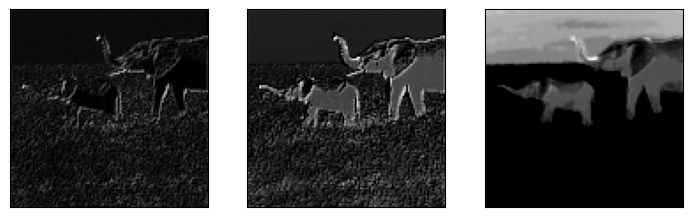

In [4]:
i=3                                                          # layer index
layer_name = model.layers[i].name                            # layer name
output = model.layers[i].output                              # define output                     
fmodel = tf.keras.Model(inputs=model.inputs, outputs=output) # feature model
fmap   = fmodel.predict(x)                                   # feature map

nx=3   # number of feature maps to show for given layers
print('layer: {} name: {} feature_map: {}'.format(i, layer_name, fmap.shape))
 
plt.figure(figsize=(24, 24)) 
for ix in range(nx):
	ax = plt.subplot(1, 8, ix+1)
	ax.set_xticks([])
	ax.set_yticks([])
	plt.imshow(fmap[0, :, :, ix], cmap='gray')
plt.show()

# Activation Maximization

Gradient ascent

In [26]:
%%script echo "from ChatGPT - needs rework"
from tensorflow.keras import models

layer_name = 'block5_conv1'  # Example layer
filter_index = 0  # Example neuron index

# Create a model that outputs the activations of the chosen layer
activation_model = models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Create a function to compute the loss that needs to be maximized
def compute_loss(input_image, filter_index):
    activation = activation_model(input_image)
    return -tf.reduce_mean(activation[:, :, :, filter_index])

# Create a function to perform gradient ascent
@tf.function
def gradient_ascent_step(img, filter_index, learning_rate):
    with tf.GradientTape() as tape:
        loss = compute_loss(img, filter_index)
    grads = tape.gradient(loss, img)

    # Check for None gradients
    if grads is not None:
        grads /= tf.maximum(tf.reduce_mean(tf.abs(grads)), 1e-8)
        img += learning_rate * grads

    return loss, img

#input_image = tf.random.uniform((1, 224, 224, 3))  # random image
iterations = 1000       
learning_rate = .01

# Perform gradient ascent to maximize activation
for i in range(iterations):
    loss, input_image = gradient_ascent_step(input_image, filter_index, learning_rate)

# Convert the final image to a displayable format
img = input_image.numpy().squeeze()
plt.imshow(img)
plt.show()


from ChatGPT - needs rework


In [27]:
%%script echo "from keras-vis: needs rework"
# https://github.com/raghakot/keras-vis/tree/master
from keras.applications import VGG16
from vis.utils import utils
from keras import activations

# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

from keras-vis: needs rework


# Saliency & Grad-Cam

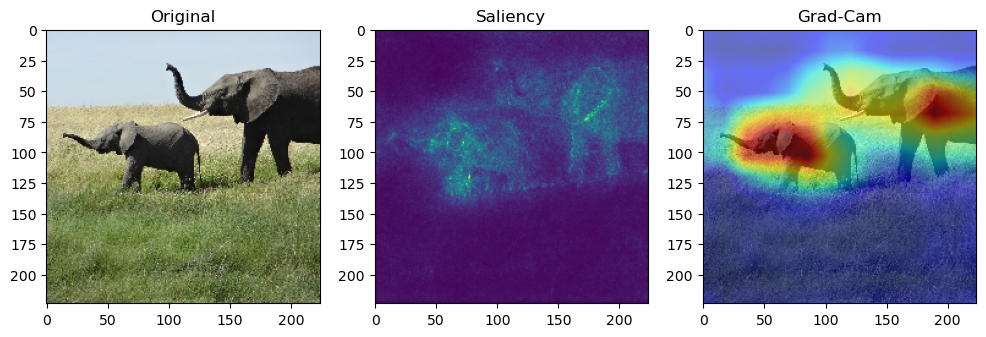

In [5]:
from matplotlib import cm
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

# define the categories of interest (list)  # c_id is the predicted label
score = CategoricalScore([c_id])

gradcam = GradcamPlusPlus( model, model_modifier=ReplaceToLinear(), clone=True)
saliency = Saliency(model, model_modifier=ReplaceToLinear(), clone=True)

#saliency_map = saliency(score, x)
saliency_map = saliency(score, x, smooth_samples=20, smooth_noise=0.20)
                        
cam          = gradcam(score, x)
heatmap      = np.uint8(cm.jet(cam[0])[..., :3] * 255)

plt.figure(figsize=(12, 5))
ax = plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original')

ax = plt.subplot(1, 3, 2)
plt.imshow(saliency_map[0]) 
plt.title('Saliency')

ax = plt.subplot(1, 3, 3)
plt.imshow(img)
plt.imshow(heatmap, cmap='jet', alpha=0.5) 
plt.title('Grad-Cam')

plt.show()